## LSTM
Long Short-Term Memory (LSTM) is a specialized type of Recurrent Neural Network (RNN) capable of learning long-term dependencies in sequence data.  
Key challenges standard RNNs face are vanishing and exploding gradients during backpropagation, which limits learning long sequences.  
LSTMs address this by using a memory cell and gating mechanisms (input, forget, output gates) to control information flow, enabling the network to maintain relevant information across time steps.

LSTM units:  
- **Cell state (memory)** that carries long-term information.  
- **Forget gate** to decide what information to discard.  
- **Input gate** to decide what new information to store.  
- **Output gate** to decide what to output.  

LSTMs are widely used in time series forecasting, language modeling, speech recognition, and many other sequential tasks.


In [1]:
## Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
# Generate synthetic sine wave data for sequence regression
def create_sine_data(seq_length=50, total_samples=1000):
    X = []
    y = []
    x_vals = np.linspace(0, 100, total_samples + seq_length)
    sine_wave = np.sin(x_vals)
    
    for i in range(total_samples):
        X.append(sine_wave[i:i+seq_length])
        y.append(sine_wave[i+seq_length])
    
    X = np.array(X)
    y = np.array(y)
    # Reshape X for LSTM [samples, time_steps, features]
    X = X.reshape((X.shape[0], X.shape[1], 1))
    return X, y

# Prepare data
seq_length = 50
X, y = create_sine_data(seq_length)

print("Input shape:", X.shape)
print("Output shape:", y.shape)


Input shape: (1000, 50, 1)
Output shape: (1000,)


In [3]:
# Build LSTM model
model = Sequential([
    LSTM(50, activation='tanh', input_shape=(seq_length,1)),
    Dense(1)
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

model.summary()

c:\Users\win10\python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Train the model
history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.3913 - val_loss: 0.0440
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0188 - val_loss: 0.0035
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0025 - val_loss: 5.4447e-04
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.3090e-04 - val_loss: 3.4468e-04
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.8284e-04 - val_loss: 2.0988e-04
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.9773e-04 - val_loss: 1.2884e-04
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.1981e-04 - val_loss: 1.0330e-04
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.7258e-05 - val_loss: 6.9109e-05
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.1716e-05 - val_loss: 3.8262e-05
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.8275e-05 - val_loss: 1.8849e-05
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.6368e-05 - val_loss: 8.6117

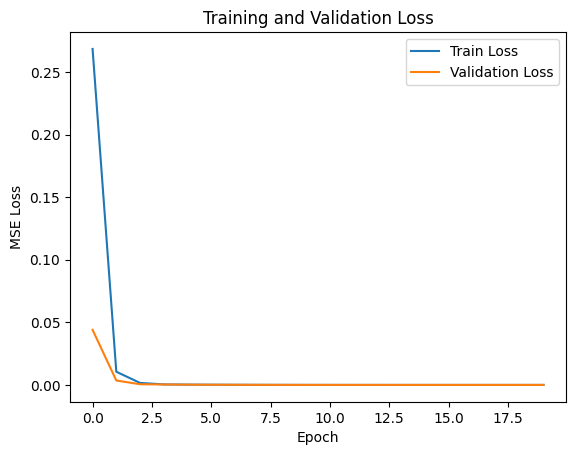

In [5]:
# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


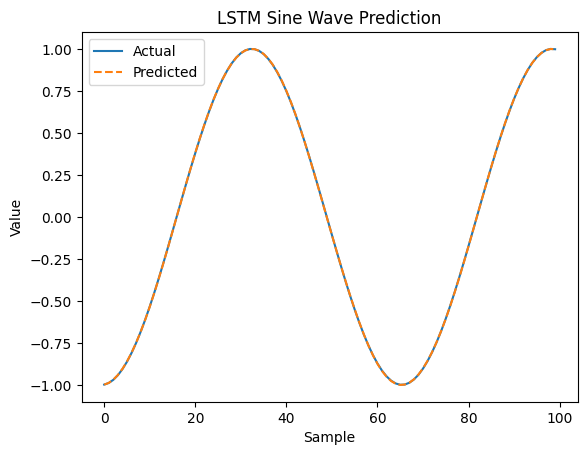

In [ ]:
# Make predictions
predictions = model.predict(X[:100])
plt.plot(y[:100], label='Actual')
plt.plot(predictions.flatten(), label='Predicted', linestyle='--')
plt.title('LSTM Sine Wave Prediction')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.show()